In [44]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
binned_data = pd.read_feather('data/binned_data')

In [3]:
binned_data.head()

,bin,channel,subject,tp00,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,tp11,tp12,tp13,tp14,tp15
0,0,AF1,0,-0.723256,-0.718173,-0.705960,-0.710029,-0.728348,-0.757844,-0.786329,-0.810746,-0.832115,-0.847375,-0.858571,-0.857546,-0.840246,-0.795487,-0.750729,-0.715121
1,0,AF2,0,-0.091558,-0.086473,-0.100712,-0.111908,-0.102762,-0.094627,-0.125137,-0.208552,-0.326544,-0.447592,-0.509646,-0.506587,-0.470985,-0.447585,-0.461812,-0.510637
2,0,AF7,0,-2.537704,-2.546856,-2.475644,-2.384094,-2.348494,-2.381046,-2.447171,-2.491927,-2.484808,-2.464467,-2.464477,-2.504146,-2.568235,-2.610956,-2.607904,-2.575356
3,0,AF8,0,-1.561142,-1.520454,-1.487896,-1.478740,-1.501123,-1.568256,-1.677100,-1.818494,-1.954810,-2.064675,-2.145042,-2.200990,-2.252875,-2.302717,-2.352560,-2.390200
4,0,AFZ,0,-0.211577,-0.218698,-0.235994,-0.255319,-0.275662,-0.298042,-0.330592,-0.367212,-0.405867,-0.443506,-0.455712,-0.441477,-0.405871,-0.376379,-0.354002,-0.344856


# Subject Network

In [75]:
subject_data = binned_data.groupby(['bin', 'subject']).mean()
subject_data

tp00      tp01      tp02      tp03      tp04      tp05  \
bin subject                                                               
0   0       -0.101262 -0.102713 -0.117604 -0.133914 -0.142736 -0.143617   
    1       -0.673332 -0.664210 -0.657640 -0.673199 -0.710504 -0.772758   
    2        0.339918  0.319457  0.293143  0.268630  0.254438  0.254940   
    3        0.468666  0.453440  0.440800  0.438715  0.438148  0.425857   
    4        0.657846  0.611103  0.554437  0.488966  0.423411  0.364411   
    5       -1.240718 -1.276973 -1.318880 -1.359503 -1.398859 -1.429278   
    6        1.225075  1.191590  1.178799  1.173245  1.154085  1.101688   
    7        0.213800  0.152149  0.122131  0.126718  0.167259  0.235315   
    8       -0.566543 -0.540244 -0.502555 -0.466536 -0.433801 -0.400648   
    9       -0.613174 -0.556057 -0.505028 -0.453580 -0.392845 -0.323622   
    10       0.082130  0.099524  0.110247  0.106677  0.094887  0.081796   
    11       0.393668  0.305317  0.209528  0.116125  0.030143 -0.042199   
    12       0.246030  0.206141  0.175307  0.147274  0.120390  0.095227   
    13       0.676675  0.684212  0.703907  0.728555  0.742246  0.744431   
    14       0.083042 -0.011563 -0.091643 -0.153061 -0.196387 -0.232942   
    15       0.052469  0.034810  0.021352  0.020219  0.025389  0.023387   
    16       0.097455  0.011205 -0.076345 -0.158158 -0.226564 -0.278828   
    17       0.050824 -0.006058 -0.060289 -0.103630 -0.138401 -0.165832   
    18       0.398531  0.414722  0.424095  0.435167  0.453312  0.476175   
    19       1.053549  1.080398  1.101376  1.124991  1.154358  1.213142   
1   0       -0.142736 -0.143617 -0.143735 -0.152773 -0.171767 -0.193897   
    1       -0.710504 -0.772758 -0.851336 -0.931466 -0.996620 -1.062424   
    2        0.254438  0.254940  0.266678  0.282088  0.292143  0.291292   
    3        0.438148  0.425857  0.411049  0.388185  0.364205  0.334354   
    4        0.423411  0.364411  0.316217  0.280330  0.262236  0.269956   
    5       -1.398859 -1.429278 -1.461795 -1.484625 -1.506904 -1.533420   
    6        1.154085  1.101688  1.009368  0.884364  0.747903  0.628750   
    7        0.167259  0.235315  0.312543  0.375730  0.407631  0.405130   
    8       -0.433801 -0.400648 -0.379269 -0.362559 -0.351653 -0.361876   
    9       -0.392845 -0.323622 -0.254899 -0.205138 -0.189596 -0.218229   
...               ...       ...       ...       ...       ...       ...   
55  10      -1.920340 -1.894108 -1.844313 -1.779359 -1.708085 -1.653803   
    11      -3.623418 -3.617731 -3.610943 -3.602288 -3.583811 -3.594584   
    12      -1.557375 -1.570000 -1.591178 -1.619078 -1.647628 -1.668707   
    13       3.427958  3.446953  3.458443  3.465897  3.472085  3.454441   
    14      -4.866524 -4.830270 -4.810691 -4.805572 -4.803738 -4.802903   
    15      -1.806450 -1.840652 -1.875506 -1.902905 -1.913361 -1.917713   
    16      -0.715799 -0.684830 -0.654230 -0.631366 -0.619843 -0.618909   
    17      -2.127596 -2.142922 -2.154830 -2.161000 -2.147076 -2.133919   
    18       0.366212  0.336728  0.294920  0.242624  0.191910  0.156324   
    19      -4.454354 -4.537251 -4.611927 -4.662523 -4.661155 -4.638242   
56  0        0.045370  0.059145  0.056377  0.020305 -0.050802 -0.143057   
    1       -2.825272 -2.850920 -2.850153 -2.811529 -2.738287 -2.643934   
    2        0.252986  0.363133  0.469377  0.569218  0.668025  0.770151   
    3       -2.598349 -2.602651 -2.596682 -2.583707 -2.573251 -2.577570   
    4       -5.041888 -5.080827 -5.131873 -5.193575 -5.254009 -5.297417   
    5       -8.861575 -8.941722 -9.025654 -9.113671 -9.195519 -9.267577   
    6       -4.590060 -4.584991 -4.583840 -4.585591 -4.596763 -4.631599   
    7       -1.978462 -2.003360 -2.028140 -2.050387 -2.060994 -2.055541   
    8       -1.455571 -1.399039 -1.344541 -1.301949 -1.272799 -1.256523   
    9       -1.923616 -1.975646 -2.024990 -2.070883 -2.112223 -2.146626   
    10      -1.708085 -1.653803 -1.614781 

In [76]:
subject_data = subject_data.reset_index()
subject_data

,bin,subject,tp00,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,tp11,tp12,tp13,tp14,tp15
0,0,0,-0.101262,-0.102713,-0.117604,-0.133914,-0.142736,-0.143617,-0.143735,-0.152773,-0.171767,-0.193897,-0.210157,-0.216593,-0.220062,-0.233620,-0.265771,-0.311249
1,0,1,-0.673332,-0.664210,-0.657640,-0.673199,-0.710504,-0.772758,-0.851336,-0.931466,-0.996620,-1.062424,-1.110252,-1.141720,-1.146556,-1.144655,-1.128027,-1.100678
2,0,2,0.339918,0.319457,0.293143,0.268630,0.254438,0.254940,0.266678,0.282088,0.292143,0.291292,0.279936,0.264944,0.255655,0.260341,0.281419,0.317490
3,0,3,0.468666,0.453440,0.440800,0.438715,0.438148,0.425857,0.411049,0.388185,0.364205,0.334354,0.311991,0.302986,0.312708,0.330301,0.347344,0.354232
4,0,4,0.657846,0.611103,0.554437,0.488966,0.423411,0.364411,0.316217,0.280330,0.262236,0.269956,0.313532,0.394179,0.498939,0.603499,0.678609,0.709409
5,0,5,-1.240718,-1.276973,-1.318880,-1.359503,-1.398859,-1.429278,-1.461795,-1.484625,-1.506904,-1.533420,-1.562303,-1.580829,-1.591853,-1.612365,-1.640046,-1.667578
6,0,6,1.225075,1.191590,1.178799,1.173245,1.154085,1.101688,1.009368,0.884364,0.747903,0.628750,0.555142,0.543486,0.593581,0.684349,0.778421,0.840306
7,0,7,0.213800,0.152149,0.122131,0.126718,0.167259,0.235315,0.312543,0.375730,0.407631,0.405130,0.372527,0.313542,0.220955,0.084593,-0.103500,-0.335100
8,0,8,-0.566543,-0.540244,-0.502555,-0.466536,-0.433801,-0.400648,-0.379269,-0.362559,-0.351653,-0.361876,-0.380938,-0.411105,-0.434585,-0.467688,-0.510779,-0.558423
9,0,9,-0.613174,-0.556057,-0.505028,-0.453580,-0.392845,-0.323622,-0.254899,-0.205138,-0.189596,-0.218229,-0.291971,-0.404169,-0.544417,-0.704010,-0.874641,-1.047257


In [107]:
one_bin = subject_data[subject_data['bin'] == 1].drop('bin', axis=1).T
one_bin.columns = one_bin.iloc[0]
one_bin = one_bin.iloc[1:]
one_corr = one_bin.astype(float).corr()
one_corr_thresh = one_corr
one_corr_thresh[one_corr_thresh >= 0.5] = 1
one_corr_thresh[one_corr_thresh < 0.5] = 0
one_corr_thresh

subject,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
subject,,,,,,,,,,,,,,,,,,,,
0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [108]:
alcoholic_nodes = [2,  3,  5,  6,  8,  9, 12, 15, 16, 18]
control_nodes = [0, 1,  4,  7, 10, 11, 13, 14, 17, 19]

/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


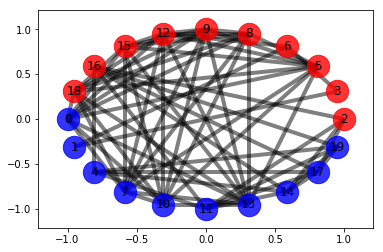

In [110]:
G = nx.from_numpy_matrix(np.array(one_corr_thresh))
pos = {2: np.array([1., 0.]), 3: np.array([0.95105652, 0.30901699]), 5: np.array([0.80901699, 0.58778525]), 6: np.array([0.58778525, 0.80901699]), 8: np.array([0.30901699, 0.95105652]), 9: np.array([6.123234e-17, 1.000000e+00]), 12: np.array([-0.30901699,  0.95105652]), 15: np.array([-0.58778525,  0.80901699]), 16: np.array([-0.80901699,  0.58778525]), 18: np.array([-0.95105652,  0.30901699]), 0: np.array([-1.0000000e+00,  1.2246468e-16]), 1: np.array([-0.95105652, -0.30901699]), 4: np.array([-0.80901699, -0.58778525]), 7: np.array([-0.58778525, -0.80901699]), 10: np.array([-0.30901699, -0.95105652]), 11: np.array([-1.8369702e-16, -1.0000000e+00]), 13: np.array([ 0.30901699, -0.95105652]), 14: np.array([ 0.58778525, -0.80901699]), 17: np.array([ 0.80901699, -0.58778525]), 19: np.array([ 0.95105652, -0.30901699])}
# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=alcoholic_nodes,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=control_nodes,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,
                       width=4,alpha=0.5,edge_color='k')
nx.draw_networkx_labels(G, pos)

plt.show()

In [127]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib as mpl
import matplotlib.animation
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def animate(data, animation_name='subject_net'):

    alcoholic_nodes = [2, 3, 5, 6, 8, 9, 12, 15, 16, 18]
    control_nodes = [0, 1, 4, 7, 10, 11, 13, 14, 17, 19]
    pos = {2: np.array([1., 0.]), 3: np.array([0.95105652, 0.30901699]), 5: np.array([0.80901699, 0.58778525]), 6: np.array([0.58778525, 0.80901699]), 8: np.array([0.30901699, 0.95105652]), 9: np.array([6.123234e-17, 1.000000e+00]), 12: np.array([-0.30901699,  0.95105652]), 15: np.array([-0.58778525,  0.80901699]), 16: np.array([-0.80901699,  0.58778525]), 18: np.array([-0.95105652,  0.30901699]), 0: np.array([-1.0000000e+00,  1.2246468e-16]), 1: np.array([-0.95105652, -0.30901699]), 4: np.array([-0.80901699, -0.58778525]), 7: np.array([-0.58778525, -0.80901699]), 10: np.array([-0.30901699, -0.95105652]), 11: np.array([-1.8369702e-16, -1.0000000e+00]), 13: np.array([ 0.30901699, -0.95105652]), 14: np.array([ 0.58778525, -0.80901699]), 17: np.array([ 0.80901699, -0.58778525]), 19: np.array([ 0.95105652, -0.30901699])}
    
    def update_graph(tp):
        ax.clear()
        ax.set_title('Time bin = {}'.format(tp))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        one_bin = data[data['bin'] == tp].drop('bin', axis=1).T
        one_bin.columns = one_bin.iloc[0]
        one_bin = one_bin.iloc[1:]
        one_corr = one_bin.astype(float).corr()
        one_corr_thresh = one_corr
        one_corr_thresh[one_corr_thresh >= 0.5] = 1
        one_corr_thresh[one_corr_thresh < 0.5] = 0

        G = nx.from_numpy_matrix(np.array(one_corr_thresh))

        # nodes
        nx.draw_networkx_nodes(G,pos,
                               nodelist=alcoholic_nodes,
                               node_color='r',
                               node_size=500,
                           alpha=0.8)
        nx.draw_networkx_nodes(G,pos,
                               nodelist=control_nodes,
                               node_color='b',
                               node_size=500,
                           alpha=0.8)

        # edges
        nx.draw_networkx_edges(G,pos,
                               width=4,alpha=0.5,edge_color='k')
        nx.draw_networkx_labels(G, pos)
        plt.box(on=False)


    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.suptitle('Subject Network')

    ani = matplotlib.animation.FuncAnimation(fig, update_graph, max(data['bin']), 
                                   interval=150, blit=False)
    ani.save(animation_name+'.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

In [128]:
animate(subject_data)

/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


# Channel Network

In [6]:
channel_data = binned_data.groupby(['bin', 'channel']).mean().drop('subject', axis=1)
channel_data

tp00      tp01      tp02      tp03      tp04      tp05  \
bin channel                                                               
0   AF1      0.237461  0.206638  0.177901  0.149621  0.123326  0.098607   
    AF2      0.225051  0.203994  0.179275  0.152418  0.126986  0.101862   
    AF7      0.159045  0.125984  0.096688  0.067952  0.035807 -0.005392   
    AF8      0.062605  0.024051 -0.015418 -0.051581 -0.083928 -0.117801   
    AFZ      0.226273  0.199622  0.173174  0.148455  0.125160  0.103339   
    C1      -0.094085 -0.127398 -0.134926 -0.145404 -0.153491 -0.174344   
    C2      -0.123208 -0.153877 -0.151233 -0.141213 -0.136229 -0.144623   
    C3      -0.023124 -0.048810 -0.076884 -0.108164 -0.108368 -0.129324   
    C4      -0.102983 -0.109189 -0.111631 -0.109036 -0.098407 -0.096523   
    C5      -0.058962 -0.075084 -0.090904 -0.110180 -0.130424 -0.148888   
    C6      -0.127380 -0.162424 -0.193908 -0.223203 -0.254891 -0.284899   
    CP1      0.091416  0.088008  0.086431  0.086584  0.086531  0.085413   
    CP2      0.009767  0.004324 -0.003256 -0.008598 -0.009614 -0.004374   
    CP3      0.134690  0.127316  0.121212  0.117651  0.115667  0.114142   
    CP4      0.057463  0.048104  0.036153  0.025728  0.021658  0.028981   
    CP5      0.158297  0.149905  0.113030  0.090294  0.094260  0.122541   
    CP6      0.070836  0.064580  0.059238  0.077395  0.097994  0.131056   
    CPZ      0.058310  0.056072  0.053426  0.053935  0.056581  0.057853   
    CZ       0.216146  0.151347  0.089752  0.043519  0.016562 -0.000374   
    F1       0.180329  0.167968  0.156524  0.145336  0.131551  0.116802   
    F2       0.139226  0.127274  0.110591  0.089076  0.065476  0.042791   
    F3       0.177722  0.159410  0.138299  0.117141  0.097661  0.081538   
    F4       0.043704  0.032616  0.014306 -0.013821 -0.046728 -0.078821   
    F5       0.121834  0.100523  0.071736  0.038014  0.006884 -0.018904   
    F6       0.021534 -0.003695 -0.041333 -0.087719 -0.133853 -0.169049   
    F7       0.079757  0.055698  0.025181 -0.008236 -0.039718 -0.071558   
    F8       0.001511 -0.036230 -0.083075 -0.134905 -0.187904 -0.236935   
    FC1     -0.036144 -0.041739 -0.045552 -0.051860 -0.060355 -0.071546   
    FC2     -0.054272 -0.061696 -0.070140 -0.081431 -0.095519 -0.110269   
    FC3      0.059374  0.052457  0.042892  0.029771  0.014054  0.000830   
...               ...       ...       ...       ...       ...       ...   
56  FC5     -2.233702 -2.250031 -2.258422 -2.263152 -2.267322 -2.272716   
    FC6     -0.837107 -0.832937 -0.834974 -0.839755 -0.845298 -0.852979   
    FCZ     -0.804556 -0.804964 -0.808880 -0.814423 -0.817372 -0.816255   
    FP1      3.105982  3.083092  3.082124  3.101706  3.125408  3.139345   
    FP2      3.517000  3.525544  3.536021  3.545381  3.554741  3.564456   
    FPZ      3.318070  3.319037  3.318783  3.321784  3.335364  3.353675   
    FT7     -2.762151 -2.784682 -2.808637 -2.828983 -2.835493 -2.827356   
    FT8     -1.778885 -1.788954 -1.801568 -1.809450 -1.811892 -1.812249   
    FZ      -0.427996 -0.423264 -0.422551 -0.420108 -0.412581 -0.402968   
    O1      -6.965654 -6.978522 -6.978826 -6.977656 -6.981067 -6.990120   
    O2      -6.926422 -6.916961 -6.903483 -6.891784 -6.885019 -6.883748   
    OZ      -6.343025 -6.338039 -6.324359 -6.309863 -6.301521 -6.300198   
    P1      -3.486038 -3.484462 -3.479782 -3.477238 -3.479881 -3.484052   
    P2      -3.998361 -3.996684 -3.988343 -3.976237 -3.964845 -3.955944   
    P3      -4.224104 -4.232444 -4.235955 -4.242973 -4.253758 -4.265355   
    P4      -4.254523 -4.255079 -4.251009 -4.244295 -4.237125 -4.229902   
    P5      -5.024735 -5.036129 -5.047116 -5.061460 -5.075549 -5.084806   
    P6      -5.489753 -5.488787 -5.486649 -5.484260 -5.481869 -5.475052   
    P7      -5.855643 -5.856560 -5.863428 -5.882350 -5.904830 -5.921260   
    P8      -6.125204 -6.124237 -6.128916 -6.134562 -6.138376 -6.135427   
    PO1     -5.287084 -5.290645 -5.287901 

In [9]:
channel_data = channel_data.reset_index()
channel_data

,bin,channel,tp00,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,tp11,tp12,tp13,tp14,tp15
0,0,AF1,0.237461,0.206638,0.177901,0.149621,0.123326,0.098607,0.072718,0.043065,0.006697,-0.037045,-0.089280,-0.151281,-0.223354,-0.303615,-0.385451,-0.459608
1,0,AF2,0.225051,0.203994,0.179275,0.152418,0.126986,0.101862,0.075363,0.044389,0.008126,-0.034088,-0.077525,-0.124776,-0.179047,-0.241302,-0.310323,-0.374970
2,0,AF7,0.159045,0.125984,0.096688,0.067952,0.035807,-0.005392,-0.056104,-0.116681,-0.181479,-0.247193,-0.314281,-0.385742,-0.467021,-0.557200,-0.648194,-0.727387
3,0,AF8,0.062605,0.024051,-0.015418,-0.051581,-0.083928,-0.117801,-0.156507,-0.201367,-0.248263,-0.291141,-0.329033,-0.366974,-0.415751,-0.478720,-0.550539,-0.616559
4,0,AFZ,0.226273,0.199622,0.173174,0.148455,0.125160,0.103339,0.078517,0.049222,0.014380,-0.025142,-0.069239,-0.119543,-0.179052,-0.246904,-0.319585,-0.386215
5,0,C1,-0.094085,-0.127398,-0.134926,-0.145404,-0.153491,-0.174344,-0.179838,-0.185332,-0.151204,-0.153440,-0.156136,-0.160154,-0.129991,-0.120126,-0.104815,-0.096320
6,0,C2,-0.123208,-0.153877,-0.151233,-0.141213,-0.136229,-0.144623,-0.149557,-0.151285,-0.111154,-0.109526,-0.098691,-0.088721,-0.057900,-0.049914,-0.046659,-0.041828
7,0,C3,-0.023124,-0.048810,-0.076884,-0.108164,-0.108368,-0.129324,-0.133547,-0.131920,-0.126582,-0.131822,-0.134821,-0.153028,-0.157556,-0.157252,-0.154911,-0.144891
8,0,C4,-0.102983,-0.109189,-0.111631,-0.109036,-0.098407,-0.096523,-0.100286,-0.095300,-0.071799,-0.055777,-0.039449,-0.012593,0.007703,0.016248,0.025507,0.024946
9,0,C5,-0.058962,-0.075084,-0.090904,-0.110180,-0.130424,-0.148888,-0.163639,-0.178948,-0.197667,-0.221726,-0.246648,-0.261906,-0.261450,-0.250565,-0.240848,-0.239170


In [71]:
one_bin = channel_data[channel_data['bin'] == 6].drop('bin', axis=1).T
one_bin.columns = one_bin.iloc[0]
one_bin = one_bin.iloc[1:]
one_corr = one_bin.astype(float).corr()
one_corr_thresh = one_corr
one_corr_thresh[one_corr_thresh >= 0.5] = 1
one_corr_thresh[one_corr_thresh < 0.5] = 0
one_corr_thresh

channel,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,...,PO1,PO2,PO7,PO8,POZ,PZ,T7,T8,TP7,TP8
channel,,,,,,,,,,,,,,,,,,,,,
AF1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AF2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AF7,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AF8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFZ,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
C2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
C3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
C4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/jmcarpenter/anaconda2/envs/fastai/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be con

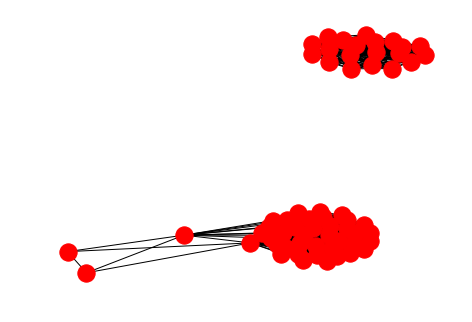

In [73]:
G = nx.from_numpy_matrix(np.array(one_corr_thresh))
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

In [25]:
adj_mat = np.ndarray((len(channel_data['channel'].unique()), len(channel_data['channel'].unique()), len(channel_data['bin'].unique())))
all_bins = channel_data['bin'].unique()
for k, cur_bin in enumerate(all_bins):
    print('Bin {}'.format(cur_bin))
    cur_channel_data = channel_data[channel_data['bin'] == cur_bin]
    for i, channel_from in enumerate(cur_channel_data['channel'].unique()):
        for j, channel_to in enumerate(cur_channel_data['channel'].unique()):
            adj_mat[i,j, k] = cosine_similarity(cur_channel_data[cur_channel_data['channel'] == channel_from].drop(['bin', 'channel'], axis=1),
                              cur_channel_data[cur_channel_data['channel'] == channel_to].drop(['bin', 'channel'], axis=1))

Bin 0
Bin 1
Bin 2
Bin 3
Bin 4
Bin 5
Bin 6
Bin 7


KeyboardInterrupt: 